In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
nside = 32
npix = hp.nside2npix(nside)

In [3]:
vec = hp.ang2vec(np.pi/4, np.pi/4)

In [4]:
ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(10))

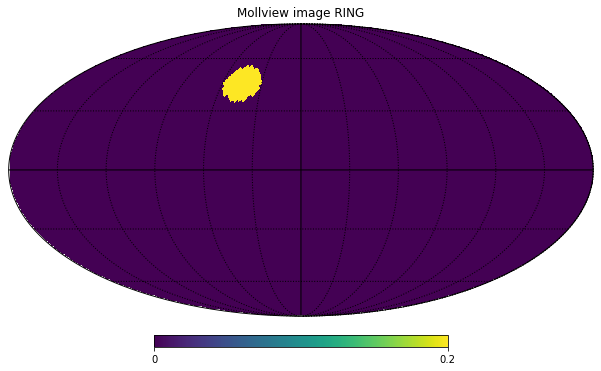

In [24]:
m = np.zeros(npix)
m[ipix_disc] = .2
hp.mollview(m, title="Mollview image RING")
hp.graticule();

In [25]:
kalms = hp.sphtfunc.map2alm(m)

lmax=hp.Alm.getlmax(len(kalms))
ls, ms = hp.Alm.getlm(lmax)
lFactor = -ls*(ls+1)
lFactor[0] = 1

baseAngle = hp.pixelfunc.pix2ang(nside, np.arange(0,npix))

lensedkSZ = np.zeros(npix)
lensedOverdensity = np.zeros(npix)

In [26]:
kalms=hp.sphtfunc.map2alm(m)

In [27]:
lensPotential = -2*kalms/(lFactor)

In [28]:
lensPotential

array([-1.06133653e-02+0.00000000e+00j,  6.41499187e-03-0.00000000e+00j,
        9.34580112e-04-0.00000000e+00j, ...,
       -2.86721427e-25+8.52607619e-18j, -1.89211963e-25+6.18400001e-17j,
        3.03092558e-18+3.03088595e-18j])

In [29]:
divLensPot = hp.alm2map_der1(lensPotential,nside)

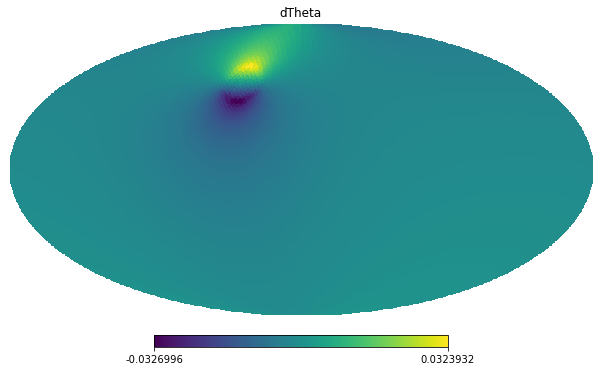

In [30]:
hp.mollview(divLensPot[1,:],title='dTheta');

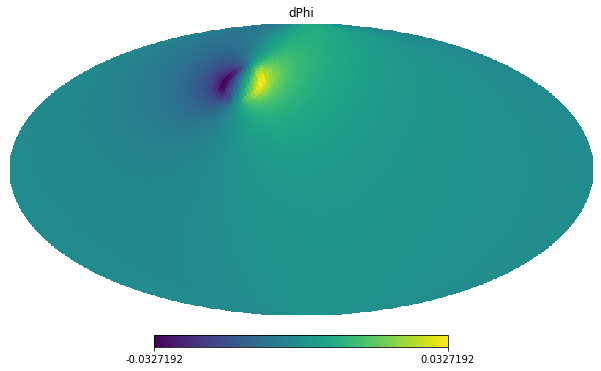

In [31]:
hp.mollview(divLensPot[2,:],title='dPhi');

In [32]:
baseAngle = hp.pixelfunc.pix2ang(nside, np.arange(0,npix))

In [33]:
deflectedTheta = baseAngle[0]+divLensPot[1]
deflectedPhi = baseAngle[1]+divLensPot[2]

In [38]:
background = np.zeros(npix)
background[ipix_disc] = 1

In [39]:
view = hp.pixelfunc.get_interp_val(background,deflectedTheta, deflectedPhi)

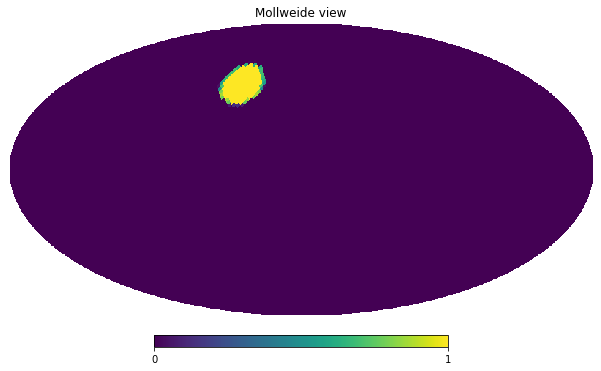

In [40]:
hp.mollview(view);

In [41]:
hp/molview-background

array([0., 0., 0., ..., 0., 0., 0.])